In [2]:
import pandas as pd
import numpy as np

In [3]:
tel = pd.read_csv("telco.csv")
tel

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [11]:
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Leave        3333 non-null   int64  
 1   MemberWeeks  3333 non-null   int64  
 2   NewContract  3333 non-null   int64  
 3   IsData       3333 non-null   int64  
 4   DataAmount   3333 non-null   float64
 5   Callcenter   3333 non-null   int64  
 6   CalMins      3333 non-null   float64
 7   CalCounts    3333 non-null   int64  
 8   MonthlyFee   3333 non-null   float64
 9   OverFee      3333 non-null   float64
 10  RoamingMin   3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


1. 가입해지 한 사용자와 해지하지 않은 사용자의 가입기간 평균 및 고객센터 전화량 평균 비교

In [5]:
tel_1 = tel[tel['Leave'].isin([1])] #가입해지 한 사용자 추출
tel_1.head()

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
10,1,65,1,0,0.29,4,129.1,137,44.9,11.43,12.7
15,1,161,1,0,0.00,4,332.9,67,84.0,15.89,5.4
21,1,77,1,0,0.00,5,62.4,89,26.0,8.50,5.7
33,1,12,1,0,0.00,1,249.6,118,64.0,12.62,11.8
41,1,135,0,1,3.94,0,173.1,85,86.4,10.20,14.6


In [27]:
a=tel_1.loc[:,["MemberWeeks", "Callcenter"]].mean().round(1) #가입기간 평균 및 고객센터 전화량 평균 구하기
a

MemberWeeks    102.7
Callcenter       2.2
dtype: float64

In [7]:
tel_2 = tel[tel['Leave'].isin([0])] #가입해지 안 한 사용자 추출
tel_2.head()

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [28]:
b=tel_2.loc[:,["MemberWeeks","Callcenter"]].mean().round(1)
b

MemberWeeks    100.8
Callcenter       1.4
dtype: float64

In [63]:
c = tel.groupby(['Leave'], as_index=False).mean().round(1) # groupby를 사용하여 한 눈에 보기
c

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
0,0,100.8,0.9,0.3,0.9,1.4,175.2,100.3,55.8,10.0,10.2
1,1,102.7,0.7,0.2,0.5,2.2,206.9,101.3,59.2,10.6,10.7


결론) 가입해지 한 사용자의 가입기간의 평균이 약 한주~두주정도 더 길고 고객센터 전화량도 약 1통 더 많다.

2. 가입기간에 따른 데이터사용량과 월평균요금의 상관관계

In [64]:
(tel[['MemberWeeks','DataAmount','MonthlyFee']].groupby('MemberWeeks',as_index=False)
 .apply(lambda df: df.sort_values('DataAmount',ascending=False)).droplevel(0)
.sort_values(['MemberWeeks'],ascending=False))

,MemberWeeks,DataAmount,MonthlyFee
817,243,0.00,31.0
1408,232,0.14,46.4
1751,225,0.00,53.0
1551,225,0.30,55.0
1886,224,0.21,36.1
...,...,...,...
1409,1,2.27,73.7
2423,1,0.00,42.0
2475,1,0.00,43.0
2960,1,0.00,43.0


결론) 가입기간과 데이터사용량 및 월평균요금은 관련이 없어보인다.

3. 월평균 요금에 따른 데이터사용량과 월평균전화량 월평균 전화수 확인

In [62]:
(
    tel
    .groupby(['MonthlyFee','Leave'])
    [['DataAmount','CalMins','CalCounts']]
    .agg('mean')
)

,,DataAmount,CalMins,CalCounts
MonthlyFee,Leave,,,
14.0,1,0.00,0.0,0.0
15.7,0,0.27,7.9,100.0
16.0,0,0.00,32.9,105.5
17.0,0,0.00,17.6,121.0
19.0,1,0.00,61.2,111.0
...,...,...,...,...
108.6,0,4.16,270.4,99.0
108.7,0,3.67,302.7,93.0
110.0,0,4.40,266.7,109.0


결과) 월평균요금이 많이 나올수록 데이터사용량과 월평균전화량도 많은 사용량을 보이며 월평균 전화수는 큰 관련이 없어보인다

4. 로밍시간에 따른 데이터사용량 및 초과요금의 평균과 표준편차

In [65]:
def max_deviation(s):
 std_score = (s - s.mean()) / s.std()
 return std_score.abs().max()

( tel.groupby('RoamingMin')[['DataAmount','OverFee']].agg([max_deviation,'mean']).round(1))

DataAmount            OverFee      
           max_deviation mean max_deviation  mean
RoamingMin                                       
0.0                  2.5  0.1           2.3   9.7
1.1                  NaN  0.0           NaN   9.3
1.3                  NaN  0.0           NaN  13.4
2.0                  0.7  0.1           0.7  11.6
2.1                  NaN  0.0           0.7  12.9
...                  ...  ...           ...   ...
18.2                 NaN  0.0           0.7  12.1
18.3                 NaN  0.0           NaN   9.3
18.4                 NaN  0.0           NaN  10.8
18.9                 NaN  0.0           NaN  10.3
20.0                 NaN  5.4           NaN  12.8

[162 rows x 4 columns]

5. 데이터사용량과 월평균요금의 관계를 나타낸 그래프

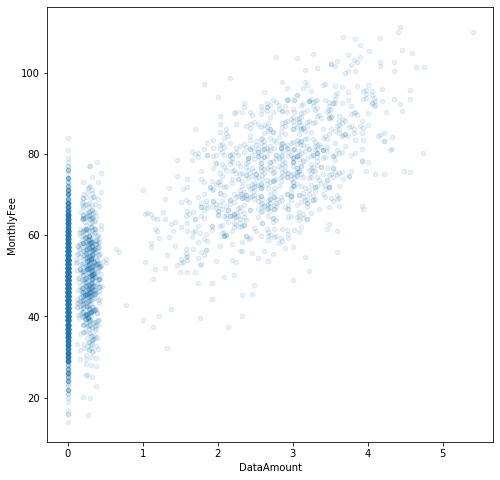

In [61]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))
tel.plot.scatter( x='DataAmount', y='MonthlyFee', alpha=.1, ax=ax )

결론) 데이터사용량이 많아질수록 월평균 요금도 많아지는 걸 알 수 있다.